In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.io import loadmat

In [2]:
data = loadmat('.\p5\ex5data1.mat')
X, y, Xtest, ytest, Xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']

In [3]:
X

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [4]:
X1 = np.hstack([np.ones([X.shape[0],1]),X])

In [5]:
theta = np.ones(X1.shape[1])

In [6]:
def coste_rl(Xs, yv, theta, reg):
    m = len(Xs)
    H = (np.matmul(Xs,theta) - yv.T)**2
    sumatorio_reg = (reg/(2*m)) * np.sum(theta[1:]**2)
    coste = (1/(2*m)) * sum(H[0]) + sumatorio_reg
    return coste

In [7]:
coste_rl(X1, y, theta, 1)

303.9931922202643

In [8]:
def gradiente_rl(Xs, yv, theta, reg):
    m = len(Xs)
    H = (np.matmul(Xs,theta) - yv.T)
    j0 = ((1/m) *  sum(H.T * Xs[0]))
    jn_1 = ((1/m) *  sum(H.T * Xs)) + (reg/m)*theta
    return np.append(j0[0], jn_1[1:])

In [9]:
gradiente_rl(X1,y,theta,1)

array([-15.30301567, 598.25074417])

In [10]:
def regresion_linear_regularizada(theta, X, yv, reg):
    """
    Devuelve el valor del coste y del gradiente aplicando regresion linear regularizada 
    sobre el conjunto de datos con entrada X y salida y 
    X     -- entrada conjunto de datos
    y     -- salida conjunto de datos
    theta -- vector de parametros theta
    reg   -- valor de regularizacion
    """
    coste = coste_rl(X,yv,theta,reg)
    gradiente = gradiente_rl(X,yv,theta,reg)
    
    return coste, gradiente

In [11]:
regresion_linear_regularizada(theta, X1, y, 1)

(303.9931922202643, array([-15.30301567, 598.25074417]))

In [12]:
tmin = opt.minimize(fun=regresion_linear_regularizada, x0=theta, args=(X1, y, 0),method='TNC',jac=True,options={'maxiter' : 70})

In [13]:
tmin

     fun: 22.373906495108947
     jac: array([ 2.61044255e-07, -1.38713461e-08])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 9
     nit: 4
  status: 1
 success: True
       x: array([13.08790378,  0.36777923])

In [14]:
def h0(teta0,teta1,x):
    return teta0 + teta1*x

<Figure size 432x288 with 0 Axes>

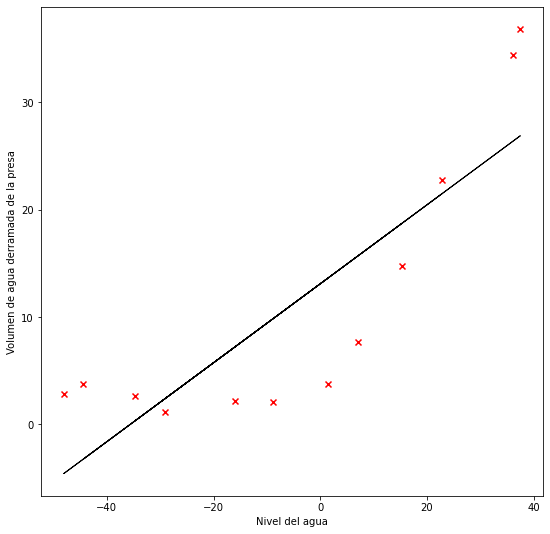

<Figure size 432x288 with 0 Axes>

In [183]:
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.scatter(X[:],y[:],c='red',marker="x")
plt.plot(X,h0(tmin['x'][0],tmin['x'][1],X), c='black',linewidth=1)
plt.xlabel('Nivel del agua')
plt.ylabel('Volumen de agua derramada de la presa')
plt.show()
plt.savefig('p5Fig1.png')

## Curvas de aprendizaje

In [15]:
the_ca = []
error_t = []
error_cv = []
Xval1 = np.hstack([np.ones([Xval.shape[0],1]),Xval])
for i in range(len(X)):
    subconjunto_x = X1[0:i+1]
    subconjunto_y = y[0:i+1]
    tmin = opt.minimize(fun=regresion_linear_regularizada, x0=theta, args=(subconjunto_x, subconjunto_y, 0),method='TNC',jac=True,options={'maxiter' : 70})
    the_ca.append(tmin['x'])
    error_t.append(coste_rl(subconjunto_x, subconjunto_y, the_ca[i], 0))
    error_cv.append(coste_rl(Xval1, yval, the_ca[i], 0))

In [16]:
the_ca

[array([ 1.06695055, -0.06697472]),
 array([3.29319568, 0.07271775]),
 array([14.15499028,  0.53912266]),
 array([14.62429824,  0.55985727]),
 array([17.21375957,  0.44974975]),
 array([15.40485121,  0.45741711]),
 array([14.26678031,  0.4368173 ]),
 array([14.62344002,  0.42312838]),
 array([13.29661008,  0.41299409]),
 array([13.85366366,  0.37780979]),
 array([12.93724128,  0.36342987]),
 array([13.08790378,  0.36777923])]

In [17]:
error_t

[8.631534185484672e-18,
 8.371044654825317e-18,
 3.286595045501339,
 2.842677689399798,
 13.15404880911494,
 19.443962512495474,
 20.098521655088906,
 18.172858695200027,
 22.60940542495472,
 23.261461592612033,
 24.31724958804419,
 22.373906495108947]

In [18]:
error_cv

[169.87070840820135,
 110.3003658450425,
 45.010231234641175,
 48.36891147269707,
 35.86516420888284,
 33.829961749819155,
 31.970985730857027,
 30.86244629494908,
 31.13599805614193,
 28.93620722435191,
 29.551431975377273,
 29.433817800893944]

<Figure size 432x288 with 0 Axes>

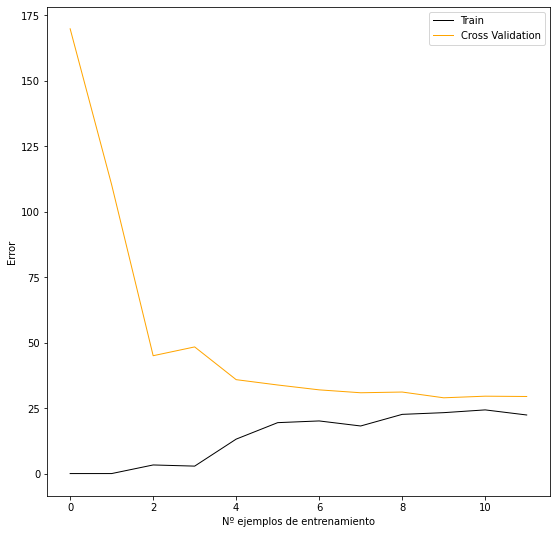

<Figure size 432x288 with 0 Axes>

In [184]:
subconjuntos = np.arange(0,12)
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.plot(subconjuntos,error_t, c='black',linewidth=1,label='Train')
plt.plot(subconjuntos,error_cv, c='orange',linewidth=1,label='Cross Validation')
plt.xlabel('Nº ejemplos de entrenamiento')
plt.ylabel('Error')
plt.legend(loc=1)
plt.show()
plt.savefig('p5Fig2.png')

## Regresion polinomial

In [237]:
def matriz_exponentes(mat, p):
    base = mat
    for i in range(1,p):
        nueva = base**(i+1)
        mat = np.hstack((mat, nueva))
    return mat

In [240]:
nM = matriz_exponentes(X,4)

In [243]:
nM[:,0]

array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
       -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
         1.38915437, -44.38375985,   7.01350208,  22.76274892])

In [244]:
def normaliza_matriz(mat):
    medias = []
    dev_estandar = []
    for i in range(len(mat)):
        mat[i] = mat[i]/np.linalg.norm(mat[i])
        medias.append(np.mean(mat[i]))
        dev_estandar.append(np.std(mat[i]))
    return mat, np.array(medias), np.array(dev_estandar)

In [245]:
nM, med, d_estandar = normaliza_matriz(nM)

In [254]:
nM[:,3]

array([0.9980294 , 0.99941152, 0.99961816, 0.99964423, 0.99978349,
       0.9937264 , 0.99786396, 0.99958481, 0.72058351, 0.99974615,
       0.98978306, 0.99903455])

In [179]:
med

array([-0.05038569,  0.21578823, -0.07733428,  0.17703726, -0.09087978])

In [180]:
d_estandar

array([0.28424394, 0.19175185, 0.27812361, 0.22801566, 0.27399671])

In [255]:
matriz_entrada = matriz_exponentes(X,8)

In [256]:
matriz_entrada, vec_medias, vec_desviacion = normaliza_matriz(matriz_entrada)

In [257]:
matriz_entrada

array([[-3.82246453e-09,  6.09176928e-08, -9.70830536e-07,
         1.54718914e-05, -2.46571792e-04,  3.92955501e-03,
        -6.26243677e-02,  9.98029401e-01],
       [-5.58423582e-11,  1.62797111e-09, -4.74602079e-08,
         1.38360645e-06, -4.03362502e-05,  1.17592186e-03,
        -3.42816256e-02,  9.99411520e-01],
       [ 1.22956635e-11,  4.44974513e-10,  1.61034268e-08,
         5.82775747e-07,  2.10903912e-05,  7.63251739e-04,
         2.76217359e-02,  9.99618155e-01],
       [ 9.59975206e-12,  3.59915703e-10,  1.34940269e-08,
         5.05920586e-07,  1.89680694e-05,  7.11154411e-04,
         2.66627344e-02,  9.99644233e-01],
       [-1.68847114e-12,  8.11459465e-11, -3.89977920e-09,
         1.87418824e-07, -9.00712928e-06,  4.32872090e-04,
        -2.08033259e-02,  9.99783494e-01],
       [-2.17474558e-07,  1.94453961e-06, -1.73870191e-05,
         1.55465300e-04, -1.39008644e-03,  1.24293995e-02,
        -1.11136953e-01,  9.93726386e-01],
       [ 5.06621125e-09,  7.755251

In [259]:
matriz_entrada1 = np.hstack([np.ones([matriz_entrada.shape[0],1]),matriz_entrada])

In [260]:
matriz_entrada[0]

array([-3.82246453e-09,  6.09176928e-08, -9.70830536e-07,  1.54718914e-05,
       -2.46571792e-04,  3.92955501e-03, -6.26243677e-02,  9.98029401e-01])

In [263]:
matriz_entrada1[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])